# Mobile price classification using machine learning

The price of a product is the most important attribute for marketing that product. One of those products where the price matters a lot is a smartphone because it comes with a lot of features so the company thinks a lot about how to price that mobile phone which can justify the features and also cover the marketing and manufacturing costs of the mobile phone.

Mobile phones are the best-selling electronic devices as people keep updating their mobile phones whenever they find new features in a new device. Thousands of mobile phones are sold daily and in such a situation it is very difficult for a person who is planning to start his own mobile phone business to decide what the price of the mobile phone should be.

In the section below, I will introduce you to a machine learning project on Mobile Device Price Classification Model where I will train a mobile price range classification model using Python. This task is based on the solution of the case study mentioned below:

''Mr. Aman wants to start his own mobile phone company and wants to fight an uphill battle with major smartphone brands like Samsung and Apple. However, he does not know how to estimate the price of a mobile phone that could cover both marketing and manufacturing costs. So for this task, you don't have to predict the actual prices of cell phones but you have to predict the price range of cell phones.''

Since our task is to classify the price range of mobile phones and not to predict the actual prices, here I will train a classification model to classify the price range of mobile phones as follows:
- 0 (low cost).
- 1 (medium cost).
- 2 (high cost).
- 4 (very high cost).st)

**Please note that my project draws inspiration from 'Machine Learning through Examples' by Dr. Alaa Tuaima, as I explore the concepts and techniques outlined in the book to create innovative solutions.** .g

### Importing libraries and loading the dataset

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tabulate import tabulate
sns.set()

In [4]:
df = pd.read_csv('mobile_prices.csv')
pd.set_option('display.max_columns', 21)

column_mapping = {
    'battery_power': 'Battery_Power',
    'blue': 'Bluetooth',
    'clock_speed': 'Clock_Speed',
    'dual_sim': 'Dual_SIM',
    'fc': 'Front_Camera',
    'four_g': '4G',
    'int_memory': 'Internal_Memory',
    'm_dep': 'Mobile_Depth',
    'mobile_wt': 'Mobile_Weight',
    'n_cores': 'Number_of_Cores',
    'pc': 'Primary_Camera',
    'px_height': 'Pixel_Height',
    'px_width': 'Pixel_Width',
    'ram': 'RAM',
    'sc_h': 'Screen_Height',
    'sc_w': 'Screen_Width',
    'talk_time': 'Talk_Time',
    'three_g': '3G',
    'touch_screen': 'Touch_Screen',
    'wifi': 'WiFi',
    'price_range': 'Price_Range'
}

# Rename the columns using the dictionary
df.rename(columns=column_mapping, inplace=True)

df.head()

,Battery_Power,Bluetooth,Clock_Speed,Dual_SIM,Front_Camera,4G,Internal_Memory,Mobile_Depth,Mobile_Weight,Number_of_Cores,Primary_Camera,Pixel_Height,Pixel_Width,RAM,Screen_Height,Screen_Width,Talk_Time,3G,Touch_Screen,WiFi,Price_Range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


### Exploratory Data Analysis (EDA) and Data Visualization

In [5]:
df.shape

(2000, 21)

In [6]:
df.isnull().sum()

Battery_Power      0
Bluetooth          0
Clock_Speed        0
Dual_SIM           0
Front_Camera       0
4G                 0
Internal_Memory    0
Mobile_Depth       0
Mobile_Weight      0
Number_of_Cores    0
Primary_Camera     0
Pixel_Height       0
Pixel_Width        0
RAM                0
Screen_Height      0
Screen_Width       0
Talk_Time          0
3G                 0
Touch_Screen       0
WiFi               0
Price_Range        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Battery_Power    2000 non-null   int64  
 1   Bluetooth        2000 non-null   int64  
 2   Clock_Speed      2000 non-null   float64
 3   Dual_SIM         2000 non-null   int64  
 4   Front_Camera     2000 non-null   int64  
 5   4G               2000 non-null   int64  
 6   Internal_Memory  2000 non-null   int64  
 7   Mobile_Depth     2000 non-null   float64
 8   Mobile_Weight    2000 non-null   int64  
 9   Number_of_Cores  2000 non-null   int64  
 10  Primary_Camera   2000 non-null   int64  
 11  Pixel_Height     2000 non-null   int64  
 12  Pixel_Width      2000 non-null   int64  
 13  RAM              2000 non-null   int64  
 14  Screen_Height    2000 non-null   int64  
 15  Screen_Width     2000 non-null   int64  
 16  Talk_Time        2000 non-null   int64  
 17  3G            

In [8]:
df.describe()

,Battery_Power,Bluetooth,Clock_Speed,Dual_SIM,Front_Camera,4G,Internal_Memory,Mobile_Depth,Mobile_Weight,Number_of_Cores,Primary_Camera,Pixel_Height,Pixel_Width,RAM,Screen_Height,Screen_Width,Talk_Time,3G,Touch_Screen,WiFi,Price_Range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


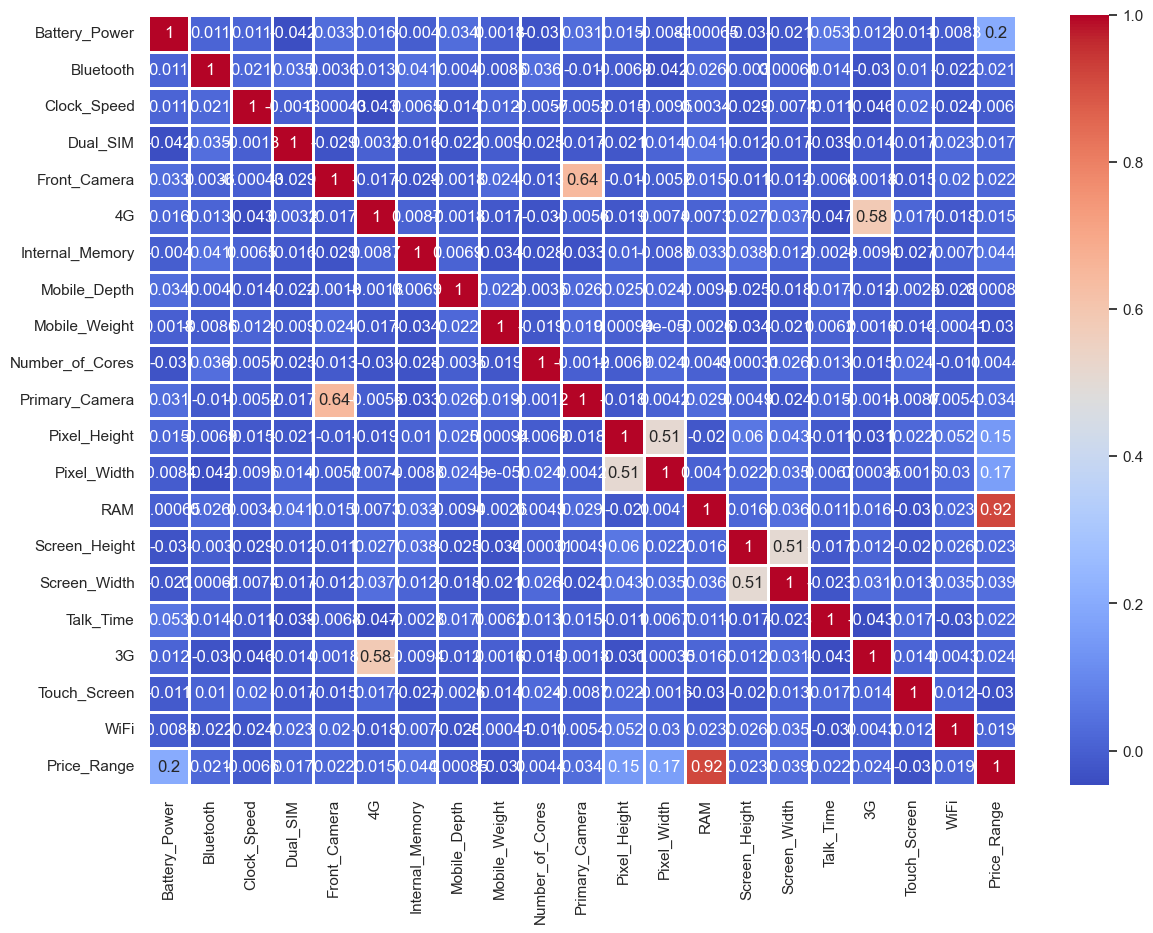

In [11]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linecolor='white', linewidths=1)
plt.show()

### Data Preprocessing and Train-Test Split for Machine Learning

x = df.drop(columns='Price_Range')
y = df['Price_Range']

X = StandardScaler().fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### Logistic Regression Modeling, Prediction and accuracy score

In [15]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy of the Logistic Regression Model: %",accuracy)

Accuracy of the Logistic Regression Model: % 95.5


### Analyzing Predicted Price Ranges

In [21]:
(unique, counts) = np.unique(y_pred, return_counts=True)
price_range = np.asarray((unique, counts)).T

table_headers = ["Predicted Price Range", "Count"]
table = tabulate(price_range, headers=table_headers, tablefmt="pretty")
print(table)

+-----------------------+-------+
| Predicted Price Range | Count |
+-----------------------+-------+
|           0           |  95   |
|           1           |  90   |
|           2           |  97   |
|           3           |  118  |
+-----------------------+-------+
